In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
import re

In [3]:
dataset = pd.read_csv("E:\data.csv")

In [4]:
dataset.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [5]:
dataset.shape

(4009, 4)

In [6]:
dataset.drop(columns=["URLs", "Body"],inplace=True, axis=0)

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
ps = PorterStemmer()

def wordopt(text):
    text = text.lower()
    text = re.sub(r'https*\S+', ' ', text)
    text = re.sub(r'[@#]\S+', ' ', text)
    text = re.sub('<.*?>', '', text)
    contractions = {"don't": 'do not', "can't": 'cannot'}
    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\s{2,}', ' ', text)
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)
    return text


In [76]:
dataset["Headline"] = dataset["Headline"].apply(wordopt)
dataset.shape

(4009, 2)

In [77]:
x = dataset["Headline"]
y = dataset["Label"]


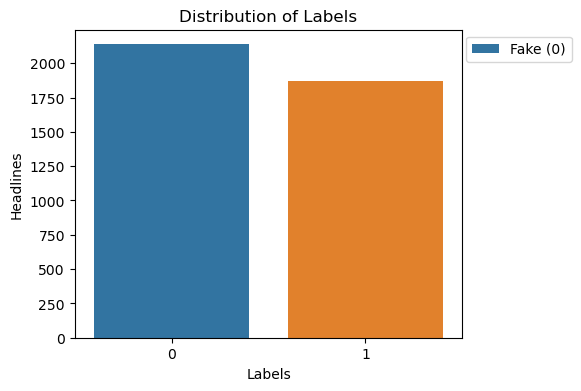

In [78]:
plt.figure(figsize=(5, 4))
#sns.countplot(x='Label', data=dataset)
ax = sns.countplot(x='Label', data=dataset)
#legend_labels, _= ax.get_legend_handles_labels('Fake (0)', 'True (1)')
ax.legend(labels=['Fake (0)', 'True (1)'],bbox_to_anchor=(1.3,1),ncol = 3)

#plt.legend(['Fake (0)', 'True (1)'],loc="center",bbox_to_anchor=(1.15,1),ncol = 3)
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Headlines")
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 42)

In [90]:
vectorization = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [129]:
KNN = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='minkowski')
KNN.fit(xv_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [130]:
KNN.score(xv_test,y_test)
pred_knn=KNN.predict(xv_test) #this function is used to make prediction.
score1 = accuracy_score(y_test,pred_knn)*100
score1

74.81296758104739

In [131]:
precision1 = precision_score(y_test, pred_knn)*100
precision1



83.47826086956522

In [132]:
recall1 = recall_score(y_test, pred_knn)*100
recall1

53.93258426966292

In [133]:
from texttable import Texttable
Data = [["Classifiers", "Average Accuracy", "Average Precision","Average Recall"], ["KNN", score1,precision1,recall1]]
table = Texttable()
table.add_rows(Data)
print(table.draw())


+-------------+------------------+-------------------+----------------+
| Classifiers | Average Accuracy | Average Precision | Average Recall |
+=============+==================+===================+================+
| KNN         | 74.813           | 83.478            | 53.933         |
+-------------+------------------+-------------------+----------------+


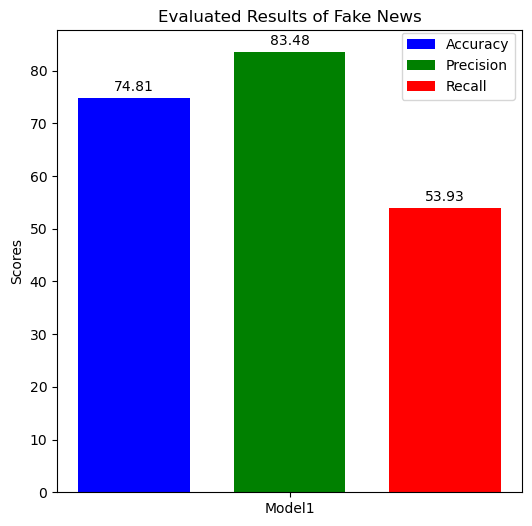

In [134]:
scores = [score1]
precision = [precision1]
recall = [recall1]
models = ["Model1"]
ind = np.arange(len(models))  
width = 0.1800 

fig, ax = plt.subplots(figsize=(6, 6))


rects1 = ax.bar(ind-0.25, scores, width, color='blue', label='Accuracy')
rects2 = ax.bar(ind, precision, width, color='green', label='Precision')
rects3 = ax.bar(ind + 0.25, recall, width, color='red', label='Recall')

# Add some text for labels, title, and axes ticks
ax.set_ylabel('Scores')
#ax.set_xlabel('Model')
ax.set_title('Evaluated Results of Fake News')
ax.set_xticks(ind)
ax.set_xticklabels(models)


ax.legend(["Accuracy", "Precision", "Recall"],bbox_to_anchor =(1, 1.01), ncol = 1)


# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, 1.0*height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
               

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


In [135]:
report = classification_report(y_test, pred_knn)
report

'              precision    recall  f1-score   support\n\n           0       0.71      0.91      0.80       669\n           1       0.83      0.54      0.66       534\n\n    accuracy                           0.75      1203\n   macro avg       0.77      0.73      0.73      1203\nweighted avg       0.77      0.75      0.74      1203\n'

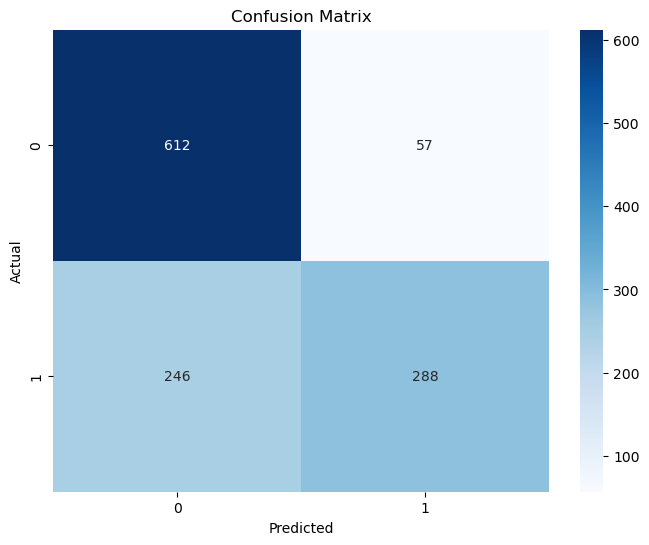

In [136]:
cm = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()